<a href="https://colab.research.google.com/github/ssshendo3501/study-record/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%9220%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習20本ノック

[Python（scikit-learn）による機械学習実装20問](https://youtu.be/Fbynk_9TfXg)

##イントロ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [ ]:
df.tail()

,Name,Age,Sex
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male
890,"Dooley, Mr. Patrick",32.0,male


##欠損値

In [ ]:
#欠損値確認
df.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

In [ ]:
#欠損値除去
df.shape

(891, 3)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(704, 3)

In [ ]:
#欠損値補完

In [ ]:
df.describe()

,Age
count,704.000000
mean,29.716151
std,14.564105
min,0.420000
25%,20.375000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
#Ageの欠損値を0で補完
df[['Age']].fillna(0)

,Age
0,22.0
1,38.0
3,35.0
4,35.0
6,54.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [ ]:
df_zero = df[['Age']].fillna(0)
df_zero.tail

<bound method NDFrame.tail of       Age
0    22.0
1    38.0
3    35.0
4    35.0
6    54.0
..    ...
885  39.0
886  27.0
887  19.0
889  26.0
890  32.0

[704 rows x 1 columns]>

In [ ]:
#欠損値を平均で補完
df_mean = df[['Age']].fillna(int(df[['Age']].mean()))
df_mean[['Age']].tail()

,Age
885,39.0
886,27.0
887,19.0
889,26.0
890,32.0


In [ ]:
df[['Age']].mean()

Age    29.716151
dtype: float64

In [ ]:
#欠損値を平均で補完
df_median = df[['Age']].fillna(int(df[['Age']].median()))
df_median[['Age']].tail()

,Age
885,39.0
886,27.0
887,19.0
889,26.0
890,32.0


In [ ]:
int(df[['Age']].median())

28

##乱数補完

In [ ]:
mean = df[['Age']].mean()
std = df[['Age']].std()
num = df[['Age']].isnull().sum()

In [ ]:
rand = np.random.randint(mean-std, mean+std, size=num)

In [ ]:
rand

array([], dtype=int64)

<Axes: >

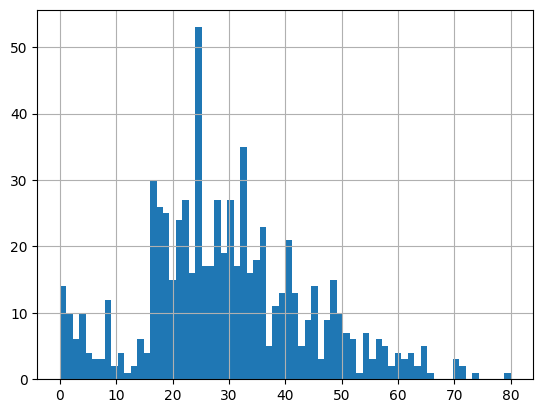

In [ ]:
#欠損値を乱数で補完し補完前後の分布を確認する
#補完前の分布（ヒストグラム）
df['Age'].dropna().astype(int).hist(bins=70)

In [ ]:
#下記で欠損値はTrueになる
df['Age'].isnull()

0      False
1      False
3      False
4      False
6      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: Age, Length: 704, dtype: bool

In [ ]:
#Trueのみ条件抽出
df['Age'][df['Age'].isnull()]

Series([], Name: Age, dtype: float64)

In [ ]:
df['Age'][df['Age'].isnull()] = rand

In [ ]:
df['Age']

0      22.0
1      38.0
3      35.0
4      35.0
6      54.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 704, dtype: float64

<Axes: >

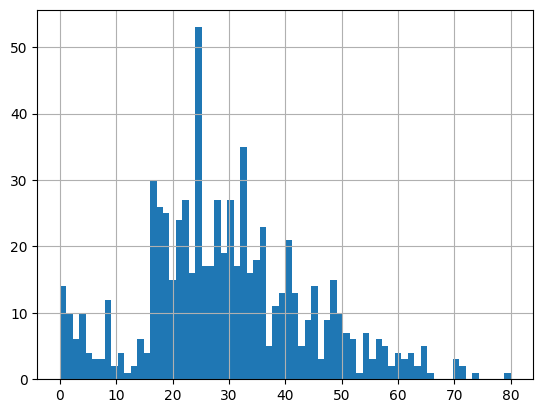

In [ ]:
df['Age'].astype(int).hist(bins=70)

In [ ]:
#前の値で補完する
#カラムsexの値を一つ前の値で補完する

In [ ]:
df[['Sex']].head()

,Sex
0,male
1,female
3,female
4,male
6,male


In [ ]:
#fillnaで引数にmethod=ffillをすることで前の値で補完することができる
df['Sex'].fillna(method='ffill').head()

0      male
1    female
3    female
4      male
6      male
Name: Sex, dtype: object

## ダミー変数へ変換

In [ ]:
#get_dummiesメソッドを使う
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
3,1,0
4,0,1
6,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [ ]:
#上記で、maleの列はいらないのdropする
pd.get_dummies(df['Sex']).drop('male', axis=1)

,female
0,0
1,1
3,1
4,0
6,0
...,...
885,1
886,0
887,1
889,0


## Min-Max Scaling

* Ageカラムのデータを最小値0、最大値1に正規化する
* ただし、元データ範囲はAgeカラムの最大値最小値とする

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler(feature_range=(0,1), copy=True)

In [ ]:
mmscaler

MinMaxScaler()

In [ ]:
lim_min, lim_max = df['Age'].min(), df['Age'].max()

In [ ]:
lim_min, lim_max

(0.42, 80.0)

In [ ]:
#縦ベクトルにする
np.array([lim_min, lim_max]).reshape(-1,1)

array([[ 0.42],
       [80.  ]])

In [ ]:
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1,1))

MinMaxScaler()

In [ ]:
mmscaler.transform(df[['Age']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.27117366],
       [0.4722292 ],
       [0.43453129],
       [0.43453129],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [0.3842674 ],
       [0.43453129],
       [0.42196532],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [0.23347575],
       [0.49736115],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [0.03242021],
       [0.23347575],
       [0.22090978],
       [0.08268409],
       [0.25860769],
       [0.61045489],
       [0.35913546],
       [0.81151043],
       [0.25860769],
       [0.35285248],
       [0.05755215],
       [0.13294798],
       [0.27117366],
       [0.4722292 ],
       [0.560191  ],
       [0.04498618],
       [0.35913546],
       [0.233

In [ ]:
df[['Age']].max()

Age    80.0
dtype: float64

In [ ]:
mmscaler.transform(df[['Age']]).max()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1.0

In [ ]:
mmscaler.transform(df[['Age']]).min()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


0.0

In [ ]:
mmscaler.transform(df[['Age']]).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


0.3681345886929105

In [ ]:
mmscaler.transform(df[['Age']]).std()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


0.18288210301187413

##標準化

* Ageカラムのデータを平均0、分散1に標準化する

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit_transform(df[['Age']])

array([[-0.5301827 ],
       [ 0.56918973],
       [ 0.3630574 ],
       [ 0.3630574 ],
       [ 1.66856216],
       [-1.90439823],
       [-0.18662882],
       [-1.76697668],
       [ 1.94340526],
       [-0.66760425],
       [ 0.63790051],
       [-1.07986891],
       [ 1.73727293],
       [-1.90439823],
       [ 0.08821429],
       [ 0.3630574 ],
       [ 0.29434662],
       [-0.11791804],
       [-1.49213357],
       [ 0.56918973],
       [-0.73631503],
       [ 0.70661128],
       [ 2.49309148],
       [-0.11791804],
       [ 0.84403284],
       [-0.59889348],
       [-0.80502581],
       [-1.07986891],
       [ 0.70661128],
       [-0.18662882],
       [-1.83568746],
       [-0.73631503],
       [-0.80502581],
       [-1.56084435],
       [-0.59889348],
       [ 1.32500827],
       [-0.04920726],
       [ 2.4243807 ],
       [-0.59889348],
       [-0.08356265],
       [-1.6982659 ],
       [-1.28600124],
       [-0.5301827 ],
       [ 0.56918973],
       [ 1.05016517],
       [-1

In [ ]:
ss.fit_transform(df[['Age']]).mean()

7.569702440626067e-17

In [ ]:
ss.fit_transform(df[['Age']]).std()

1.0

##主成分分析

In [ ]:
df_wine = pd.read_csv('/content/wine.csv')

In [ ]:
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#説明変数の標準化
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
dfs = ss.fit_transform(df_wine.iloc[:, 1:])

In [ ]:
pd.DataFrame(dfs, columns=df_wine.columns[1:])

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
#PCAモデル生成

In [ ]:
dfs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(dfs)

PCA()

In [ ]:
feature = pca.transform(dfs)

In [ ]:
feature = pd.DataFrame(feature, columns=['PC1',
                              'PC2',
                              'PC3',
                              'PC4',
                              'PC5',
                              'PC6',
                              'PC7',
                              'PC8',
                              'PC9',
                              'PC10',
                              'PC11',
                              'PC12',
                              'PC13'])

In [ ]:
#内包表記
['PC{}'.format(x+1) for x in range(len(pd.DataFrame(dfs).columns))]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

In [ ]:
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [ ]:
#主成分分析の可視化
#第1主成分と第2主成分で散布図を可視化する
#PC1～PC13まであるが、PC1が最も情報量が濃く、PC2, PC3…となっていく
#PC1が第1主成分、PC2が第2主成分

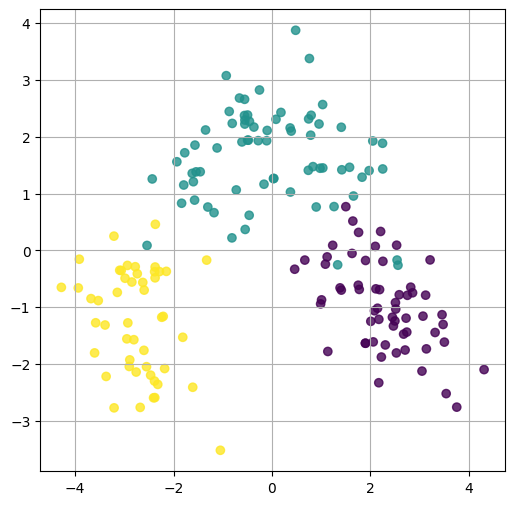

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(feature['PC1'], feature['PC2'], alpha=0.8, c=df_wine['class'])
plt.grid()
plt.show()

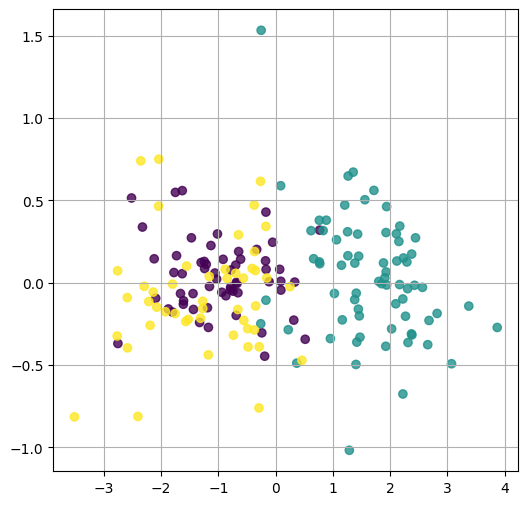

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(feature['PC2'], feature['PC13'], alpha=0.8, c=df_wine['class'])
plt.grid()
plt.show()

## ロジスティック回帰

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
6,"McCarthy, Mr. Timothy J",54.0,male


In [ ]:
x = feature.iloc[:, :2]

In [ ]:
df_wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
y = df_wine.iloc[:, 0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
x_train.shape

(142, 2)

In [ ]:
#ロジスティック回帰のモデル学習

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#モデルの評価
#予測値作成
y_pred = lr.predict(x_test)

In [ ]:
x_test

,PC1,PC2
40,2.588095,-0.779616
53,2.224791,-1.875168
34,1.410389,-0.697934
109,1.578275,1.462034
159,-1.609912,-2.406638
23,1.644988,0.516279
46,2.726601,-1.191335
72,-0.725372,1.063645
78,1.262931,0.770850
38,1.502195,0.769432


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9166666666666666

## k-近傍法

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knc.predict(x_test)
y_pred

array([1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 3, 3, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 2])

In [ ]:
score = knc.score(x_test, y_test)
score

0.9166666666666666

##重回帰分析

In [ ]:
df_slump = pd.read_csv('/content/slump.csv')

In [ ]:
df_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [ ]:
x = df_slump.iloc[:, :-1]

In [ ]:
y = df_slump.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
#重回帰モデルの作成

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
#重回帰モデルの評価
#決定係数R2、平均二乗誤差RMSEを評価する

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8343195909006847

In [ ]:
mean_squared_error(y_test, y_pred)

9.390614418464358